In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [30]:
# Use the print() function to display the latitude and longitude combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

11.079218314950694 -6.7931360191481645
45.7329198958968 56.28279708960329
31.32170266016749 -12.884955211025868
-19.75406667483317 31.377882445412155
22.488294799101098 2.133339809842141
-10.43511639020467 -140.85888858296238
85.45803380119756 -51.345324664748034
8.896692286510643 -179.89480208397143
73.60708492140589 -91.04517322731098
52.88805357694409 66.1496839855808
-35.944470499155024 2.9799097539180934
-22.90237377122847 81.75747218148621
-52.86533136842089 -86.50597952295236
80.10489150144238 -92.72224256943235
42.401149636271754 167.9404569705506
43.94654679253293 -159.19123616520716
-79.52561361179062 -53.43670051622601
-11.439537563330575 -34.724297436878146
48.778729852697495 30.699648919773352
-31.65228896526994 57.932347293008775
47.9285147843448 -158.0335913890774
-50.55402385570444 -52.129465909488246
69.7795086822986 -73.46649065566649
-8.305982563859587 -64.02004360618925
-46.24164382856902 -37.54074513565132
44.79390730694729 -16.1562021730241
-25.0558143475768 -118.

-67.90601195484044 153.65910056703194
21.932611329024297 -50.33233750888212
14.629748920102486 43.61025445271707
-83.28705261493499 -84.91046622179512
-38.09141432958988 20.080815528913377
-43.62445426546766 40.21556969070974
72.52244400223839 -138.5327592740441
49.419318303099715 -135.49820910755608
-6.865587810126996 124.31168336132725
-28.8375348358232 -116.7037647064687
43.22014794717032 108.689722072125
21.408289797358677 68.16049962586334
-2.55523285055871 -83.9207781299809
15.141358767022808 -16.789828770306485
85.28779812715109 -143.3546316654239
79.13693179395821 -174.08382632927498
7.134046406044817 94.52896287650316
-33.72430169116488 65.03938130009212
-20.13460260667651 -11.584973781484791
8.11556174694175 40.61503289005316
-2.3963189184696887 -109.46196287285424
16.31753795840487 -167.79540067839588
19.15531522118698 44.17174961775035
83.63251442465642 78.36829557520991
32.1359883366697 24.777905690726584
60.257388296457776 -25.426243546782132
62.01924354486903 121.2440933

In [31]:
from citipy import citipy

In [32]:
# list for holding cities
cities = []
# Identify the nearest city for each latitude and longitude combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique add it to list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

596

In [33]:
# Import requests library
import requests

# Import the API key
from config import weather_api_key

In [34]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db4265c7aa77944fd28a5e0563ef4bb1


In [35]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [36]:
# Create an empty list ot hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests. get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the dae to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("------------------------")
print("Data Retrieval Complete      ")
print("------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | kolondieba
Processing Record 2 of Set 1 | beyneu
Processing Record 3 of Set 1 | teguise
Processing Record 4 of Set 1 | masvingo
Processing Record 5 of Set 1 | tessalit
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | esil
Processing Record 11 of Set 1 | saldanha
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | coruripe
Processing Record 19 of Set 1 | babanka
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | clyde river
Processi

Processing Record 38 of Set 4 | talnakh
Processing Record 39 of Set 4 | ugoofaaru
Processing Record 40 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 4 | dunedin
Processing Record 42 of Set 4 | suzun
Processing Record 43 of Set 4 | samarai
Processing Record 44 of Set 4 | kajaani
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | pontianak
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | ulladulla
Processing Record 49 of Set 4 | cururupu
Processing Record 50 of Set 4 | kamyaran
Processing Record 1 of Set 5 | ponta do sol
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | rayong
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | tingo maria
Processing Record 6 of Set 5 | chernyshevskiy
Processing Record 7 of Set 5 | bambous virieux
Processing Record 8 of Set 5 | inuvik
Processing Record 9 of Set 5 | chapayevka
Processing Record 10 of Set 5 | honiara
Processing Record

Processing Record 28 of Set 8 | cassia
Processing Record 29 of Set 8 | victoria
Processing Record 30 of Set 8 | pevek
Processing Record 31 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 32 of Set 8 | cockburn town
Processing Record 33 of Set 8 | porto san giorgio
Processing Record 34 of Set 8 | palu
Processing Record 35 of Set 8 | port shepstone
Processing Record 36 of Set 8 | honningsvag
Processing Record 37 of Set 8 | killybegs
Processing Record 38 of Set 8 | los llanos de aridane
Processing Record 39 of Set 8 | tarakan
Processing Record 40 of Set 8 | narsaq
Processing Record 41 of Set 8 | saint george
Processing Record 42 of Set 8 | itoman
Processing Record 43 of Set 8 | kroya
Processing Record 44 of Set 8 | pisco
Processing Record 45 of Set 8 | gokak
Processing Record 46 of Set 8 | daru
Processing Record 47 of Set 8 | jinji
Processing Record 48 of Set 8 | pundaguitan
Processing Record 49 of Set 8 | banes
Processing Record 50 of Set 8 | russell
Processing Recor

Processing Record 15 of Set 12 | harper
Processing Record 16 of Set 12 | tevaitoa
Processing Record 17 of Set 12 | kralendijk
Processing Record 18 of Set 12 | anadyr
Processing Record 19 of Set 12 | karcag
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | ambodifototra
City not found. Skipping...
Processing Record 22 of Set 12 | visby
Processing Record 23 of Set 12 | livani
Processing Record 24 of Set 12 | puerto cabello
Processing Record 25 of Set 12 | chippewa falls
Processing Record 26 of Set 12 | mareeba
Processing Record 27 of Set 12 | aldan
Processing Record 28 of Set 12 | kirkenes
Processing Record 29 of Set 12 | gilbues
Processing Record 30 of Set 12 | amapa
Processing Record 31 of Set 12 | paredon
Processing Record 32 of Set 12 | awbari
Processing Record 33 of Set 12 | kurumkan
Processing Record 34 of Set 12 | vila
Processing Record 35 of Set 12 | port blair
Processing Record 36 of Set 12 | buqayq
City not found. Skipping...
Processing Record 37 of Se

In [37]:
len(city_data)

548

In [38]:
# Convert arrays to DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kolondieba,11.0882,-6.8926,82.49,55,76,10.38,ML,2022-06-08 20:21:40
1,Beyneu,45.3167,55.2000,74.55,28,8,7.96,KZ,2022-06-08 20:21:41
2,Teguise,29.0605,-13.5640,68.22,78,20,25.32,ES,2022-06-08 20:21:41
3,Masvingo,-20.0637,30.8277,49.03,85,0,5.57,ZW,2022-06-08 20:21:41
4,Tessalit,20.1986,1.0114,96.01,15,99,9.24,ML,2022-06-08 20:21:41
5,Atuona,-9.8000,-139.0333,78.46,74,13,18.92,PF,2022-06-08 20:21:42
6,Upernavik,72.7868,-56.1549,34.34,95,100,9.28,GL,2022-06-08 20:21:42
7,Thompson,55.7435,-97.8558,68.16,40,75,12.66,CA,2022-06-08 20:21:42
8,Esil,51.9556,66.4042,61.12,46,2,3.69,KZ,2022-06-08 20:21:43
9,Saldanha,-33.0117,17.9442,59.05,89,70,8.55,ZA,2022-06-08 20:21:43


In [39]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kolondieba,ML,2022-06-08 20:21:40,11.0882,-6.8926,82.49,55,76,10.38
1,Beyneu,KZ,2022-06-08 20:21:41,45.3167,55.2000,74.55,28,8,7.96
2,Teguise,ES,2022-06-08 20:21:41,29.0605,-13.5640,68.22,78,20,25.32
3,Masvingo,ZW,2022-06-08 20:21:41,-20.0637,30.8277,49.03,85,0,5.57
4,Tessalit,ML,2022-06-08 20:21:41,20.1986,1.0114,96.01,15,99,9.24
5,Atuona,PF,2022-06-08 20:21:42,-9.8000,-139.0333,78.46,74,13,18.92
6,Upernavik,GL,2022-06-08 20:21:42,72.7868,-56.1549,34.34,95,100,9.28
7,Thompson,CA,2022-06-08 20:21:42,55.7435,-97.8558,68.16,40,75,12.66
8,Esil,KZ,2022-06-08 20:21:43,51.9556,66.4042,61.12,46,2,3.69
9,Saldanha,ZA,2022-06-08 20:21:43,-33.0117,17.9442,59.05,89,70,8.55


In [40]:
# Create output file
output_data_file = "weather_data/cities.csv"
# Export
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

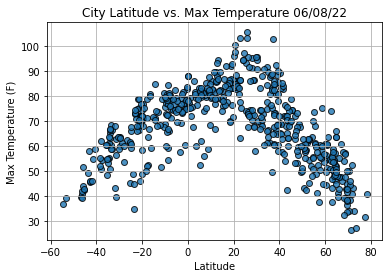

In [42]:
# Import time module
import time

# Build scatter plot for lat and lon
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

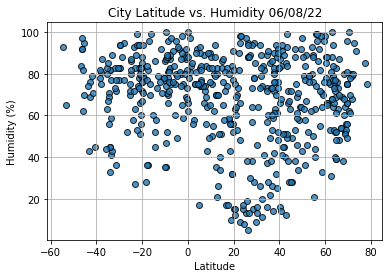

In [43]:
# Build scatter plot for lat and humidity
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

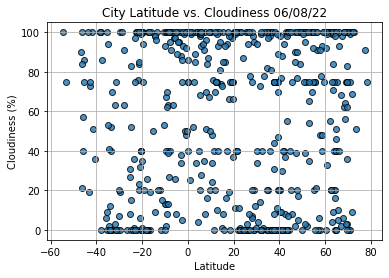

In [44]:
# Build scatter plot for lat and lon
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

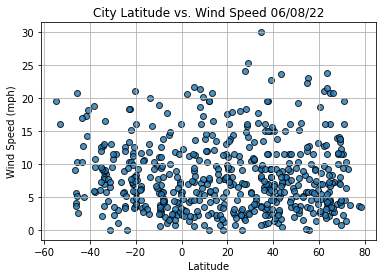

In [45]:
# Build scatter plot for lat and lon
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]

In [49]:
index13

City                   Nikolskoye
Country                        RU
Date          2022-06-08 20:21:44
Lat                       59.7035
Lng                       30.7861
Max Temp                    60.69
Humidity                       98
Cloudiness                    100
Wind Speed                   6.02
Name: 13, dtype: object

In [50]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kolondieba,ML,2022-06-08 20:21:40,11.0882,-6.8926,82.49,55,76,10.38
1,Beyneu,KZ,2022-06-08 20:21:41,45.3167,55.2000,74.55,28,8,7.96
2,Teguise,ES,2022-06-08 20:21:41,29.0605,-13.5640,68.22,78,20,25.32
4,Tessalit,ML,2022-06-08 20:21:41,20.1986,1.0114,96.01,15,99,9.24
6,Upernavik,GL,2022-06-08 20:21:42,72.7868,-56.1549,34.34,95,100,9.28


In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

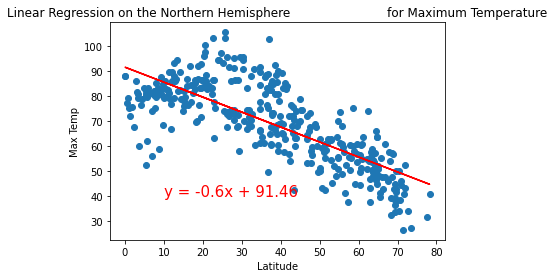

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

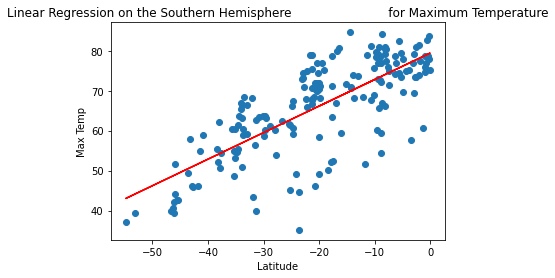

In [53]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

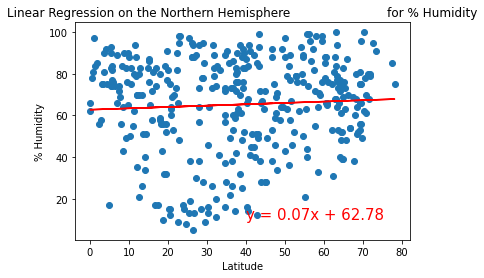

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

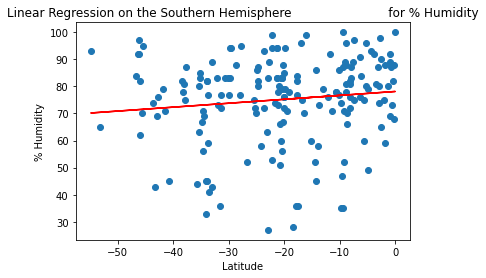

In [55]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

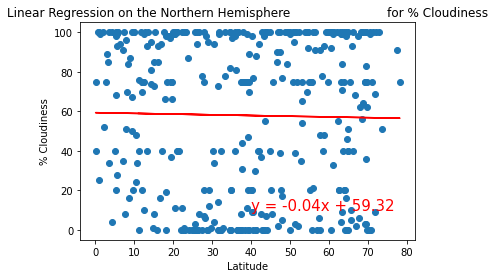

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

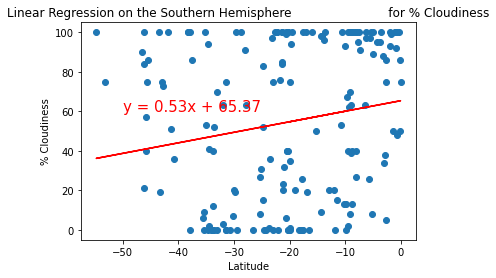

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

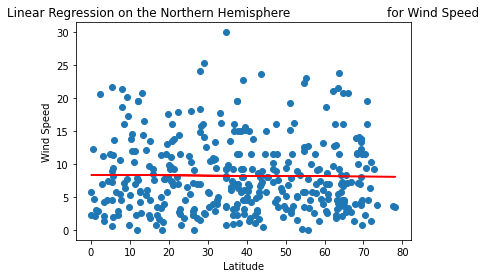

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

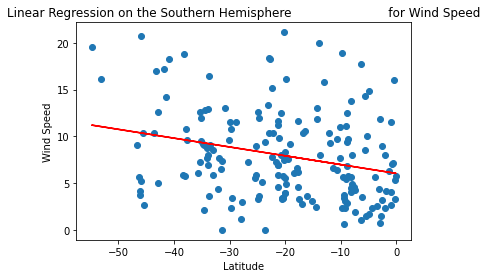

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))